In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score

In [2]:
# Daten einlesen
data = pd.read_csv('model_new.csv')

In [3]:
data.head()

,R1_1,R1_2,R1_3,R1_4,R1_5,R1_6,R3_1,R3_2,R3_3,R3_4,R3_5,R3_6,R4_1,R4_2,R4_3,R4_4,R4_5,R4_6,class,activity
0,0.001111,0.000219,0.000439,0.000362,0.000342,0.000650,0.000268,0.000650,0.000537,0.000116,0.000094,0.000552,0.000920,0.001127,0.000246,0.000292,0.000431,0.001656,1,drilling
1,0.001377,0.001184,0.001193,0.000865,0.000210,0.001131,0.001096,0.000345,0.000496,0.000823,0.000070,0.000124,0.000499,0.000291,0.000759,0.000554,0.001224,0.001280,1,drilling
2,0.000603,0.001458,0.001701,0.001461,0.000691,0.001315,0.000762,0.000343,0.000061,0.000129,0.000610,0.000255,0.000404,0.000404,0.000598,0.001617,0.002922,0.001125,1,drilling
3,0.000647,0.001622,0.001138,0.001645,0.000174,0.000324,0.000486,0.000302,0.000255,0.000283,0.000259,0.000209,0.000935,0.000325,0.001138,0.000907,0.002185,0.001153,1,drilling
4,0.000496,0.002436,0.001304,0.001717,0.000259,0.001168,0.001910,0.000633,0.000451,0.000512,0.000406,0.000285,0.000265,0.000633,0.001719,0.000485,0.002365,0.001859,1,drilling


<Axes: title={'center': 'Activity type'}, xlabel='activity'>

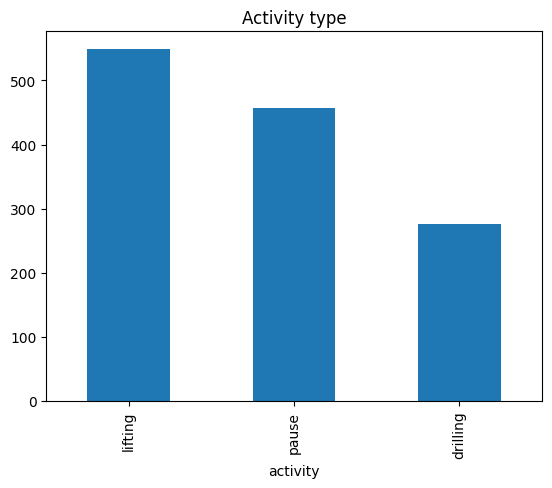

In [4]:
data['activity'].value_counts().plot(kind='bar', title='Activity type')

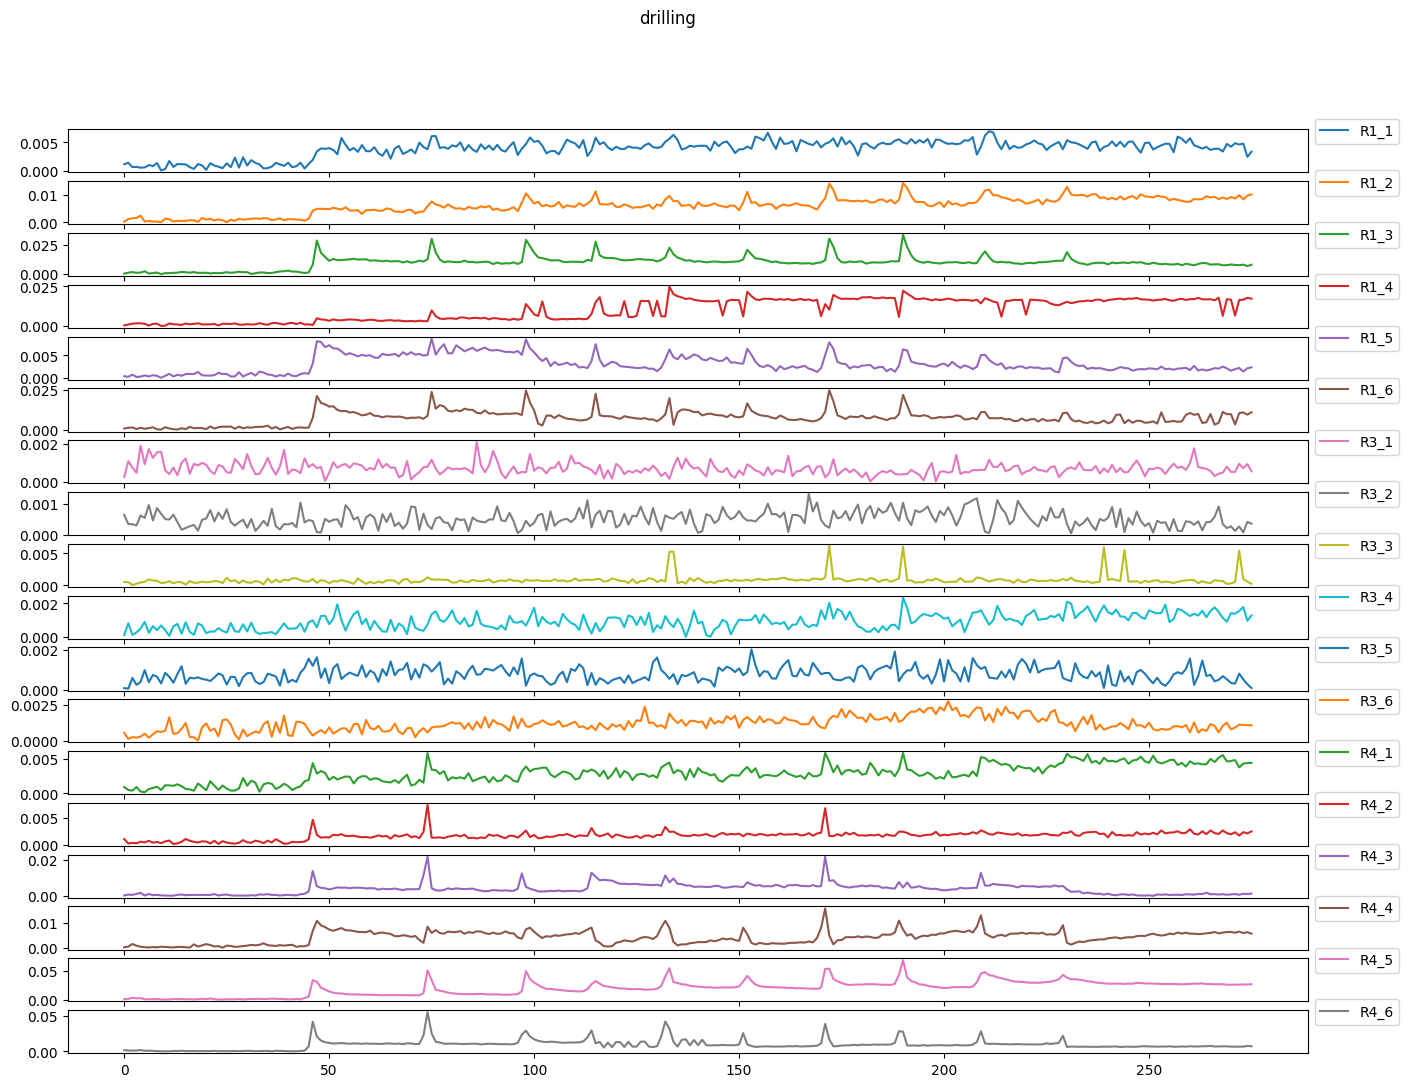

In [5]:
def plot_activity(activity, df):
    data = df[df['activity'] == activity][['R1_1', 'R1_2', 'R1_3', 'R1_4', 'R1_5', 'R1_6', 'R3_1', 'R3_2', 'R3_3', 'R3_4', 'R3_5', 'R3_6', 'R4_1', 'R4_2', 'R4_3', 'R4_4', 'R4_5', 'R4_6']]
    axis = data.plot(subplots=True, figsize=(16, 12), title=activity)
    for ax in axis:
        ax.legend(loc='lower left', bbox_to_anchor=(1.0, 0.5))

plot_activity("drilling", data)


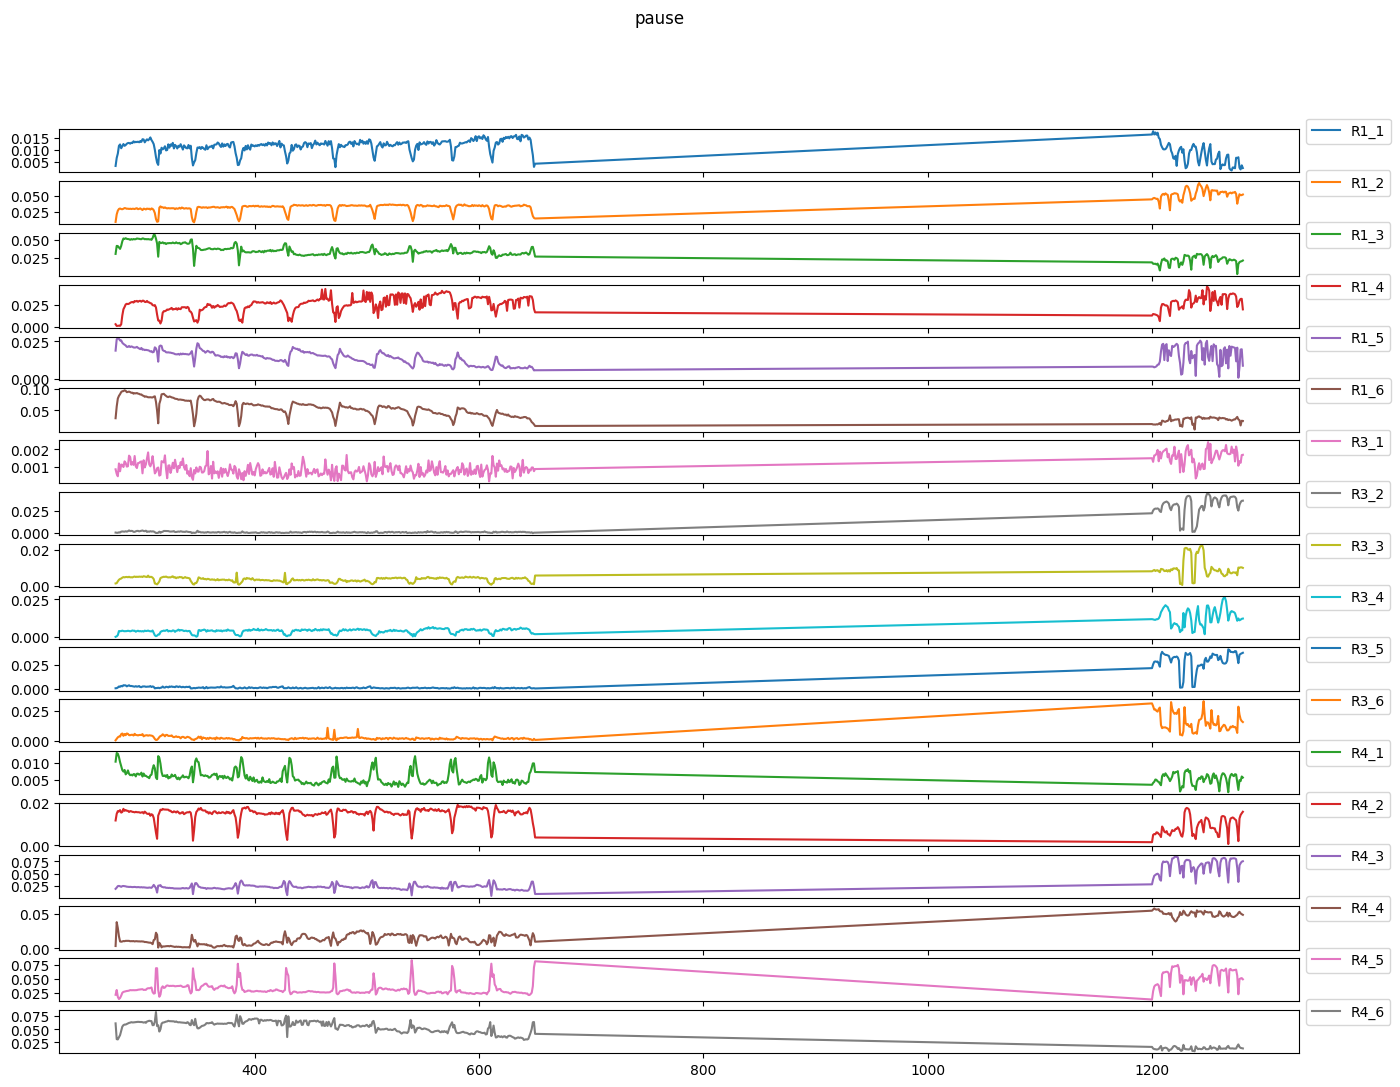

In [6]:
plot_activity("pause", data)

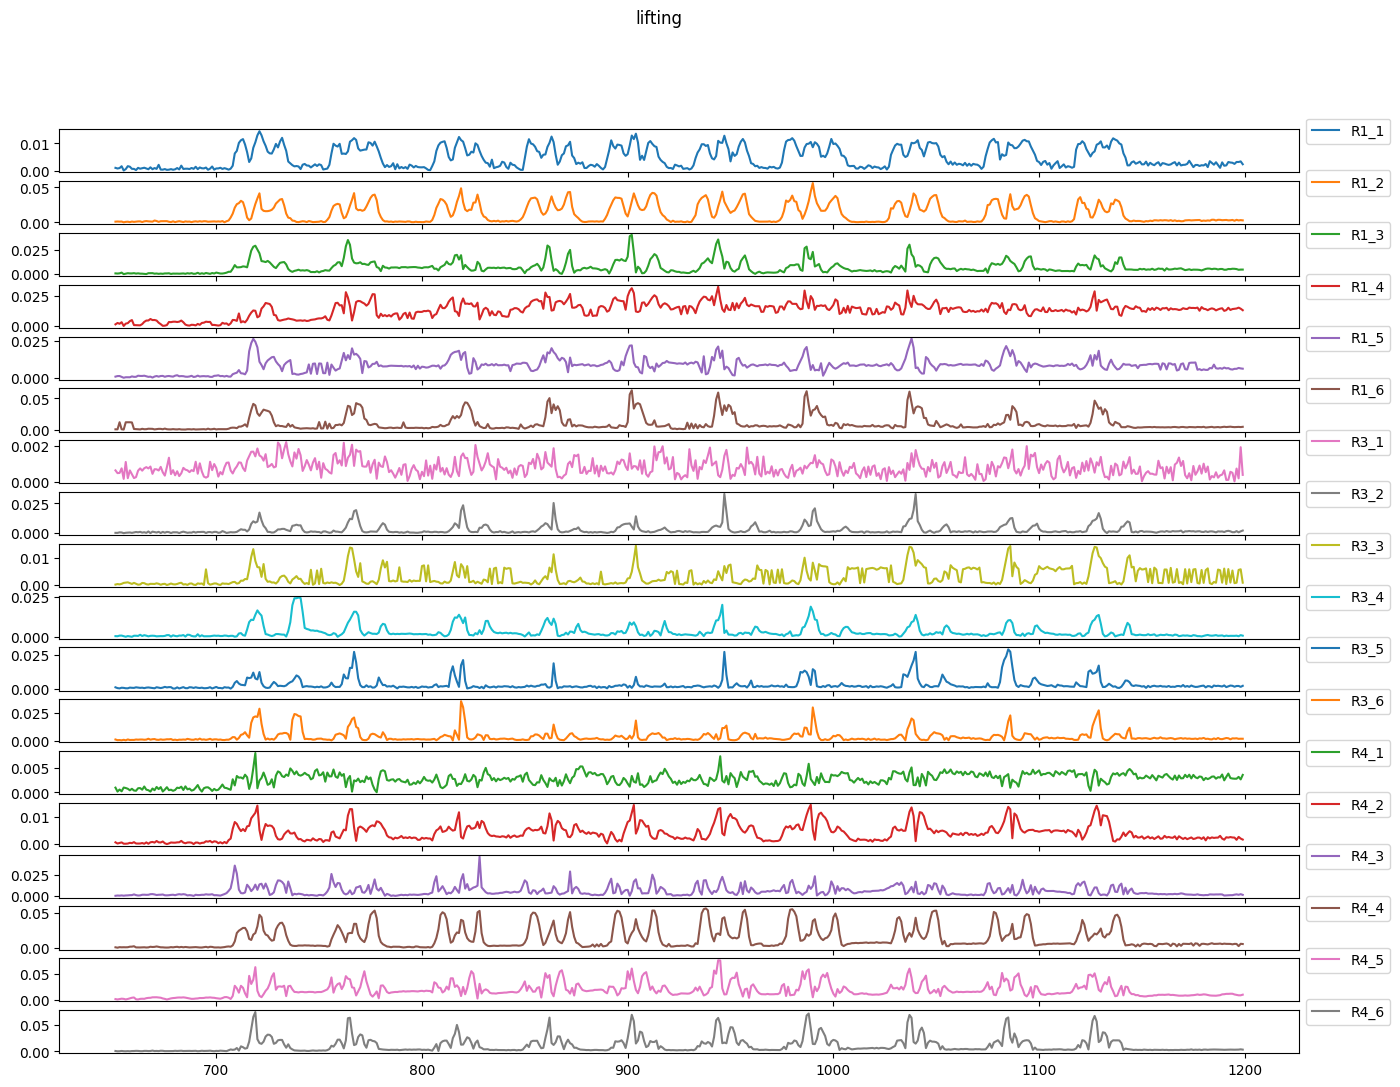

In [7]:
plot_activity("lifting", data)

In [8]:
# Preprocessing
X = data.drop(['class', 'activity'], axis=1)
y = data['class']
activity_labels = data['activity']
num_classes = 3

In [9]:
X

,R1_1,R1_2,R1_3,R1_4,R1_5,R1_6,R3_1,R3_2,R3_3,R3_4,R3_5,R3_6,R4_1,R4_2,R4_3,R4_4,R4_5,R4_6
0,0.001111,0.000219,0.000439,0.000362,0.000342,0.000650,0.000268,0.000650,0.000537,0.000116,0.000094,0.000552,0.000920,0.001127,0.000246,0.000292,0.000431,0.001656
1,0.001377,0.001184,0.001193,0.000865,0.000210,0.001131,0.001096,0.000345,0.000496,0.000823,0.000070,0.000124,0.000499,0.000291,0.000759,0.000554,0.001224,0.001280
2,0.000603,0.001458,0.001701,0.001461,0.000691,0.001315,0.000762,0.000343,0.000061,0.000129,0.000610,0.000255,0.000404,0.000404,0.000598,0.001617,0.002922,0.001125
3,0.000647,0.001622,0.001138,0.001645,0.000174,0.000324,0.000486,0.000302,0.000255,0.000283,0.000259,0.000209,0.000935,0.000325,0.001138,0.000907,0.002185,0.001153
4,0.000496,0.002436,0.001304,0.001717,0.000259,0.001168,0.001910,0.000633,0.000451,0.000512,0.000406,0.000285,0.000265,0.000633,0.001719,0.000485,0.002365,0.001859
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1277,0.006869,0.046466,0.017088,0.024471,0.000704,0.029292,0.001048,0.025612,0.010222,0.012327,0.027271,0.028321,0.002047,0.002006,0.032977,0.051888,0.023196,0.021058
1278,0.002486,0.052854,0.019650,0.029546,0.007694,0.027587,0.001308,0.032130,0.010150,0.011099,0.036164,0.021785,0.004898,0.012689,0.066896,0.053584,0.050387,0.016249
1279,0.001769,0.051257,0.020532,0.031424,0.019498,0.015450,0.001213,0.035058,0.010343,0.011517,0.037136,0.017979,0.004652,0.014342,0.071252,0.051278,0.051431,0.014440
1280,0.003489,0.051565,0.020983,0.031482,0.019714,0.026251,0.001663,0.036619,0.010328,0.012081,0.037726,0.016441,0.005978,0.015159,0.074383,0.050037,0.051996,0.013867


In [10]:
def create_sliding_windows(data, labels, activity_labels, window_size, step_size):
    if len(data) < window_size or len(labels) < window_size or len(activity_labels) < window_size:
        raise ValueError("Input data are shorter than window")

    num_windows = (len(data) - window_size) // step_size + 1

    X_windows = np.array([data[i:i+window_size] for i in range(0, len(data) - window_size + 1, step_size)])
    y_windows = np.array([labels[i+window_size-1] for i in range(0, len(labels) - window_size + 1, step_size)])
    activity_labels_windows = np.array([activity_labels[i:i+window_size] for i in range(0, len(activity_labels) - window_size + 1, step_size)])
    
    return X_windows, y_windows, activity_labels_windows

window_size =55
step_size =10
X_windows, y_windows, activity_labels_windows = create_sliding_windows(X, y, activity_labels, window_size, step_size)


In [11]:
print(len(X_windows))
print(len(y_windows))
print(len(activity_labels_windows))

123
123
123


In [12]:
# Print the contents of each sliding window
for i, window in enumerate(X_windows):
    print(f"Window {i+1}:\n{window}")
    print("=" * 80)


Window 1:
[[1.11145566e-03 2.18729951e-04 4.38524039e-04 3.61705056e-04
  3.42162225e-04 6.50324616e-04 2.68164692e-04 6.49945645e-04
  5.37232697e-04 1.16338704e-04 9.41260391e-05 5.51745416e-04
  9.20353865e-04 1.12664327e-03 2.45929806e-04 2.91941694e-04
  4.30938209e-04 1.65591097e-03]
 [1.37673045e-03 1.18353322e-03 1.19262860e-03 8.64572798e-04
  2.10292417e-04 1.13115659e-03 1.09649171e-03 3.45288356e-04
  4.96399244e-04 8.23008825e-04 6.96851782e-05 1.24456121e-04
  4.99270316e-04 2.90714576e-04 7.59470637e-04 5.54190246e-04
  1.22361354e-03 1.28042367e-03]
 [6.02735297e-04 1.45844348e-03 1.70147314e-03 1.46084291e-03
  6.91160186e-04 1.31500566e-03 7.61687949e-04 3.43227095e-04
  6.08860008e-05 1.28963649e-04 6.10386396e-04 2.54782588e-04
  4.04000885e-04 4.04123564e-04 5.97917692e-04 1.61743204e-03
  2.92213191e-03 1.12524380e-03]
 [6.46734817e-04 1.62201555e-03 1.13753038e-03 1.64455102e-03
  1.74166263e-04 3.23853378e-04 4.85509932e-04 3.02464511e-04
  2.55097948e-04 2.8264

In [13]:
# Split data
X_train, X_test, y_train, y_test, activity_labels_train, activity_labels_test = train_test_split(
    X_windows, y_windows, activity_labels_windows,
    test_size=0.2, stratify=y_windows
)
print(len(activity_labels_test))

25


In [14]:
print(len(X_train))
print(len(X_test))

98
25


In [15]:
# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train.reshape(-1, X.shape[1])).reshape(X_train.shape)
X_test = scaler.transform(X_test.reshape(-1, X.shape[1])).reshape(X_test.shape)


In [16]:
# Build LSTM model
model = Sequential()
model.add(LSTM(64, input_shape=(window_size, X_train.shape[2]), return_sequences=True, activation='relu'))
model.add(Dropout(0.2))
model.add(LSTM(32, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

In [17]:
# Compile the model
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   


 lstm (LSTM)                 (None, 55, 64)            21248     
                                                                 
 dropout (Dropout)           (None, 55, 64)            0         
                                                                 
 lstm_1 (LSTM)               (None, 32)                12416     
                                                                 
 dense (Dense)               (None, 3)                 99        
                                                                 
Total params: 33763 (131.89 KB)
Trainable params: 33763 (131.89 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [18]:
# Define Callbacks
callbacks = [
    EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
]

In [19]:
# Train the model
history = model.fit(
    X_train, y_train,
    batch_size=64,
    epochs=100,
    validation_split=0.1,
    callbacks=callbacks,
    verbose=1
)


Epoch 1/100
2/2 [==============================] - 4s 516ms/step - loss: 1.1207 - accuracy: 0.1364 - val_loss: 1.0636 - val_accuracy: 0.4000
Epoch 2/100
2/2 [==============================] - 0s 71ms/step - loss: 1.0014 - accuracy: 0.5795 - val_loss: 0.9812 - val_accuracy: 0.8000
Epoch 3/100
2/2 [==============================] - 0s 72ms/step - loss: 0.9055 - accuracy: 0.7841 - val_loss: 0.8894 - val_accuracy: 0.8000
Epoch 4/100
2/2 [==============================] - 0s 111ms/step - loss: 0.8200 - accuracy: 0.7955 - val_loss: 0.7682 - val_accuracy: 0.9000
Epoch 5/100
2/2 [==============================] - 0s 74ms/step - loss: 0.7333 - accuracy: 0.7955 - val_loss: 0.6047 - val_accuracy: 0.9000
Epoch 6/100
2/2 [==============================] - 0s 74ms/step - loss: 0.5919 - accuracy: 0.7955 - val_loss: 0.4231 - val_accuracy: 0.9000
Epoch 7/100
2/2 [==============================] - 0s 104ms/step - loss: 0.4777 - accuracy: 0.7955 - val_loss: 55.4550 - val_accuracy: 0.8000
Epoch 8/100
2/2 

In [20]:
# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test Accuracy:", test_acc)

1/1 [==============================] - 0s 109ms/step - loss: 0.3113 - accuracy: 0.9600
Test Accuracy: 0.9599999785423279


In [21]:
len(X_test)

25

In [22]:
# Predict class labels
y_pred_probs = model.predict(X_test)
y_pred_labels = np.argmax(y_pred_probs, axis=1)
y_true_labels = y_test

len(y_true_labels)

1/1 [==============================] - 0s 383ms/step


25

In [23]:
# Print predicted and true class labels
output_lines = [
    f"Predicted Class: {pred}    True Class: {true}"
    for pred, true in zip(y_pred_labels, y_true_labels)
]


print(output_lines)
print(len(output_lines))

['Predicted Class: 2    True Class: 2', 'Predicted Class: 2    True Class: 2', 'Predicted Class: 1    True Class: 1', 'Predicted Class: 2    True Class: 2', 'Predicted Class: 1    True Class: 1', 'Predicted Class: 0    True Class: 0', 'Predicted Class: 2    True Class: 2', 'Predicted Class: 2    True Class: 2', 'Predicted Class: 1    True Class: 1', 'Predicted Class: 0    True Class: 0', 'Predicted Class: 1    True Class: 1', 'Predicted Class: 2    True Class: 2', 'Predicted Class: 2    True Class: 2', 'Predicted Class: 0    True Class: 0', 'Predicted Class: 0    True Class: 0', 'Predicted Class: 2    True Class: 2', 'Predicted Class: 0    True Class: 0', 'Predicted Class: 2    True Class: 2', 'Predicted Class: 0    True Class: 0', 'Predicted Class: 2    True Class: 2', 'Predicted Class: 2    True Class: 2', 'Predicted Class: 0    True Class: 0', 'Predicted Class: 0    True Class: 0', 'Predicted Class: 0    True Class: 0', 'Predicted Class: 2    True Class: 1']
25


In [24]:
output = "\n".join(output_lines)
print(output)
print(len(output))

Predicted Class: 2    True Class: 2
Predicted Class: 2    True Class: 2
Predicted Class: 1    True Class: 1
Predicted Class: 2    True Class: 2
Predicted Class: 1    True Class: 1
Predicted Class: 0    True Class: 0
Predicted Class: 2    True Class: 2
Predicted Class: 2    True Class: 2
Predicted Class: 1    True Class: 1
Predicted Class: 0    True Class: 0
Predicted Class: 1    True Class: 1
Predicted Class: 2    True Class: 2
Predicted Class: 2    True Class: 2
Predicted Class: 0    True Class: 0
Predicted Class: 0    True Class: 0
Predicted Class: 2    True Class: 2
Predicted Class: 0    True Class: 0
Predicted Class: 2    True Class: 2
Predicted Class: 0    True Class: 0
Predicted Class: 2    True Class: 2
Predicted Class: 2    True Class: 2
Predicted Class: 0    True Class: 0
Predicted Class: 0    True Class: 0
Predicted Class: 0    True Class: 0
Predicted Class: 2    True Class: 1
899


In [25]:
# Calculate accuracy using accuracy_score
accuracy = accuracy_score(y_true_labels, y_pred_labels)
print("Total:", len(y_true_labels))
print("Accuracy:", accuracy)

Total: 25
Accuracy: 0.96


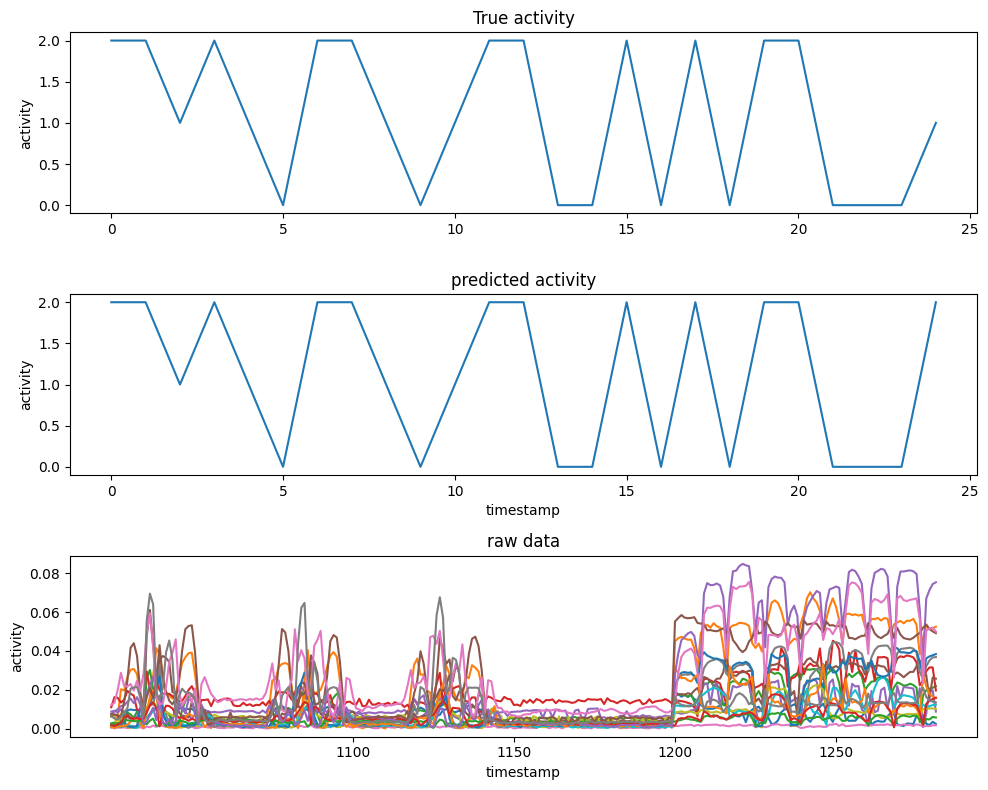

In [26]:

dd = X.iloc[1025:]
plt.figure(figsize=(10, 8)) 

# Kombinierte vorhergesagte Labels
combined_true_labels = y_true_labels
combined_pred_labels = []

for pred_labels in y_pred_labels:
    if np.isscalar(pred_labels):
        pred_labels = np.array([pred_labels])
    combined_pred_labels.extend(pred_labels)

combined_pred_labels = np.array(combined_pred_labels)

# Subplot 1: True activity
plt.subplot(3, 1, 1) 
plt.plot(combined_true_labels)
plt.title("True activity")
plt.ylabel("activity")

# Subplot 2: Vorhergesagte Aktivität
plt.subplot(3, 1, 2) 
plt.plot(combined_pred_labels)
plt.title("predicted activity")
plt.xlabel("timestamp")
plt.ylabel("activity")

# Subplot 3: Rohdaten
plt.subplot(3, 1, 3) 
plt.plot(dd)
plt.title("raw data")
plt.xlabel("timestamp")
plt.ylabel("activity")

plt.tight_layout()
plt.show()
